# Python Programming for Satellite Imaging 

## Install libraries
Go to GDAL section
https://www.lfd.uci.edu/~gohlke/pythonlibs/#gdal
then download GDAL version which is compatible with python version and OS (32bit or 64bit)
since we are using python 3.6 and if you have windows 64 bit OS, first download "GDAL‑2.3.3‑cp36‑cp36m‑win_amd64.whl" file, navigate to downloaded directory and install using pip3
`pip3 install GDAL‑2.3.3‑cp36‑cp36m‑win_amd64.wh`

In [16]:
import os
import gdal
import numpy as np 
import matplotlib.pyplot as plt

In [2]:
img = gdal.Open('MODIS_721-2017-02-06.tiff')

In [3]:
print(img.RasterXSize)
print(img.RasterYSize)
print(img.RasterCount)

657
633
3


Geoprojection is telling how the image is transformed.

In [4]:
print(img.GetProjection())

GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433],AUTHORITY["EPSG","4326"]]


In [5]:
print(img.GetGeoTransform())

(103.392333984375, 0.002197265625, 0.0, 13.550537109374998, 0.0, -0.002197265625)


Getting the bands information 

In [6]:
band_1 = img.GetRasterBand(1)

mat_band_1 = band_1.ReadAsArray(0, 0, img.RasterXSize, img.RasterYSize)

In [7]:
print(type(mat_band_1))
print(mat_band_1.dtype)
print(mat_band_1.shape)

<class 'numpy.ndarray'>
uint8
(633, 657)


In [8]:
print(np.max(mat_band_1))
print(np.min(mat_band_1))

195
0


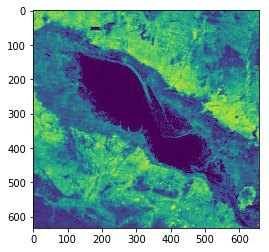

In [9]:
plt.imshow(mat_band_1)
plt.show()

In [10]:
img_lake = mat_band_1 < 20

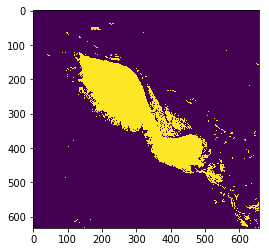

In [11]:
plt.imshow(img_lake)
plt.show()

Writing image

In [12]:
driver = gdal.GetDriverByName("GTiff")
outdata = driver.Create('out.tif', img.RasterXSize, img.RasterYSize, 1, gdal.GDT_UInt16)

outdata.SetGeoTransform(img.GetGeoTransform())
outdata.SetProjection(img.GetProjection())
outdata.GetRasterBand(1).WriteArray(img_lake)
outdata.FlushCache() 
outdata=None

Cutting down img into 50x50 pixels

In [18]:
img2 = gdal.Open('MODIS_721-2017-02-06.tiff')
band2_1 = img2.GetRasterBand(1)
mat_band2_1 = band2_1.ReadAsArray(0, 0, img2.RasterXSize, img.RasterYSize)

if not os.path.exists('tiles'):
    os.makedirs('tiles')

for i1 in range(0, img2.RasterXSize-50, 50):
    for i2 in range(0, img2.RasterYSize-50, 50):
        tile_band_1 = band2_1.ReadAsArray(i1, i2, 50, 50)
        driver = gdal.GetDriverByName("GTiff")
        outdata = driver.Create('.//tiles//out_'+str(i1)+'_'+str(i2)+'.tif', 50, 50, 1, gdal.GDT_UInt16)
        
        tile_geo = list(img2.GetGeoTransform())
        tile_geo[0] = tile_geo[0] + (i1*tile_geo[1])
        tile_geo[3] = tile_geo[3] + (i2*tile_geo[5])
        
        outdata.SetGeoTransform(tile_geo)
        outdata.SetProjection(img2.GetProjection())
        
        outdata.GetRasterBand(1).WriteArray(tile_band_1)
        
        outdata.FlushCache() 
        outdata=None

In [19]:
print(tile_geo)

[104.710693359375, 0.002197265625, 0.0, 12.342041015624998, 0.0, -0.002197265625]
